# Pandas - vztahy mezi více proměnnými

In [1]:
# Importy jako obvykle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Načteme si spojené tabulky z předchozí lekce:

In [2]:
movies_complete = pd.read_csv("./movies_complete.csv.gz")
movies_with_rating = pd.read_csv("./movies_with_rating.csv.gz")

## Vztahy mezi dvěma proměnnými

Když jsme studovali vlastnosti zemí světa, věnovali jsme se především jednotlivým charakteristikám zvlášť, nanejvýš jsme si udělali intuitivní obrázek z bodového grafu ("scatter plot"), kde osy *x* a *y* patřily dvěma různým vlastnostem. Nyní se vztahy mezi více proměnnými budeme zabývat podrobněji a ukážeme si i některé odvážnější vizualizace.

Poznámka: Budeme pokračovat s výše uvedenými filmovými daty (a jejich sloučenými tabulkami), a tak je třeba, abys spustil/a
všechny buňky předcházející této kapitole.

Co se týče vztahů mezi proměnnými, dost záleží na tom, jakého jsou typu. Tomu se podřizují zvolené typy grafů i vhodné statistické veličiny.

### Dvě číselné proměnné

Minule jsme si ukázali, jak rychle získat přehled o vlastnostech jednotlivých numerických proměnných, tak si to zopákněme:

In [3]:
movies_complete.describe()                         # Tabulka základních statistických parametrů

,Unnamed: 0,year,length,imdb_rating,imdb_votes,boxoffice_rank,lifetime_gross,tomatoes_rating,tomatoes_votes
count,474.000000,474.000000,474.000000,474.000000,4.740000e+02,474.000000,4.740000e+02,474.000000,474.000000
mean,236.500000,2000.272152,112.529536,7.502110,2.049621e+05,3645.890295,7.643727e+07,88.369198,150.299578
std,136.976275,18.099671,24.468735,0.690525,2.618299e+05,3452.106932,1.101133e+08,15.831859,97.208147
min,0.000000,1927.000000,63.000000,2.700000,3.890000e+02,3.000000,1.047400e+04,5.000000,39.000000
25%,118.250000,1993.000000,95.000000,7.200000,3.088050e+04,687.250000,3.564070e+06,88.000000,65.000000
50%,236.500000,2007.000000,108.000000,7.600000,1.031485e+05,2343.000000,3.542173e+07,93.000000,120.500000
75%,354.750000,2013.000000,123.000000,7.975000,2.878735e+05,6152.500000,1.022663e+08,96.000000,221.500000
max,473.000000,2018.000000,219.000000,9.200000,2.037678e+06,14657.000000,7.000596e+08,100.000000,444.000000


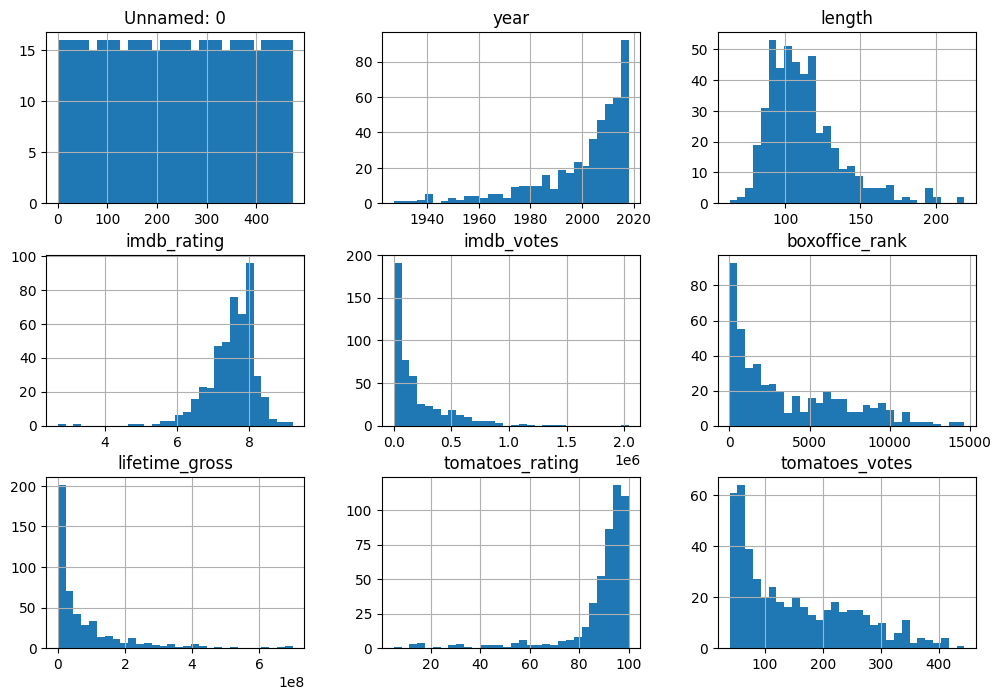

In [4]:
movies_complete.hist(figsize=(12, 8), bins=30);    # Histogram coby přibližná distribuční funkce

Nejjednodušším pohledem na dvě číselné proměnné je klasický bodový graf ([`.plot.scatter`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html?highlight=scatter)), který jsme si už ukazovali - hodnoty dvou proměnných tvoří hodnoty souřadnic. Pomocí něj se podíváme, jaký je vztah mezi počtem hodnotitelů a průměrným hodnocením na IMDb. Očekáváme, že na špatné filmy se "nikdo nedívá" (a málokdo je hodnotí), v čemž nám následující graf dává za pravdu:

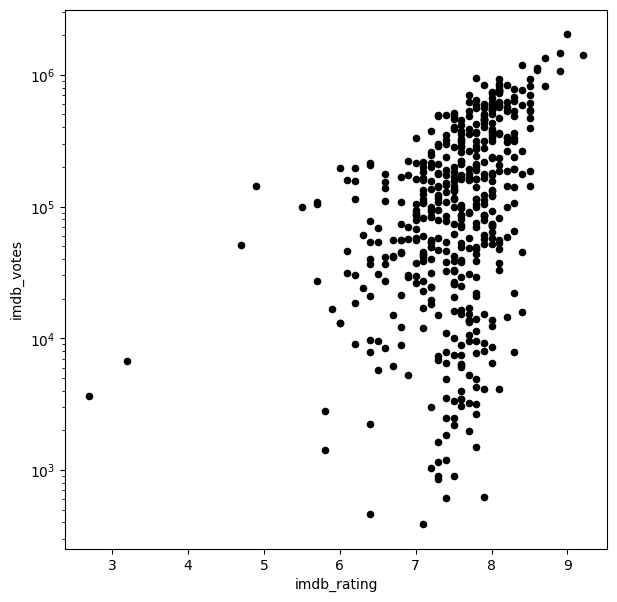

In [5]:
movies_complete.plot.scatter(
    x="imdb_rating",
    y="imdb_votes",
    c="black",
    figsize=(7, 7),
    logy=True
);

💡 Podobnou službu udělá i funkce seabornu [`scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html), jen neumí logaritmické měřítko sama o sobě.

Už při několika stovkách filmů nám ale začínají jednotlivé body splývat. Stejný graf pro všechny ohodnocené filmy (~200 000) bude vypadat už naprosto nepřehledně:

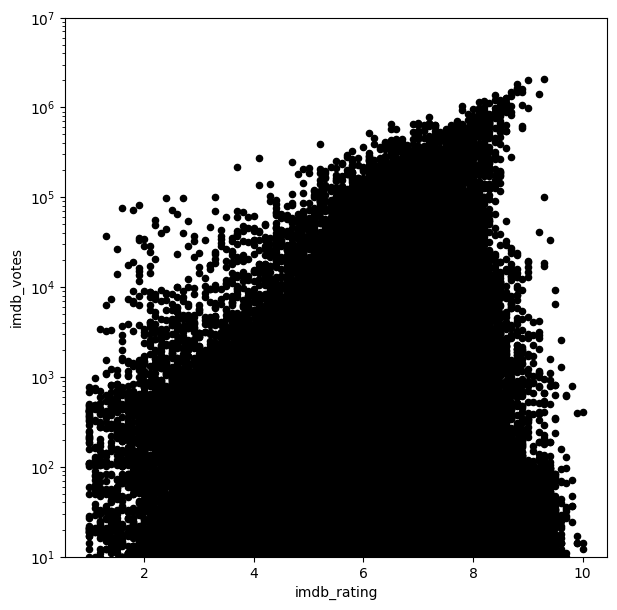

In [6]:
movies_with_rating.plot.scatter(
    x="imdb_rating",
    y="imdb_votes",
    c="black",
    figsize=(7, 7),
    logy=True,
    ylim=(10, 1e7)
);

Pro takové množství zřejmě bude vhodnější nějakým způsobem reflektovat spíš souhrnnou hustotu bodů než jednotlivé body jako takové. První možností je udělat body dostatečně "průhledné" (pomocí argumentu `alpha`) a velké (argument `s`), aby splývaly a výraznější barva odpovídala více bodům v témže okolí:

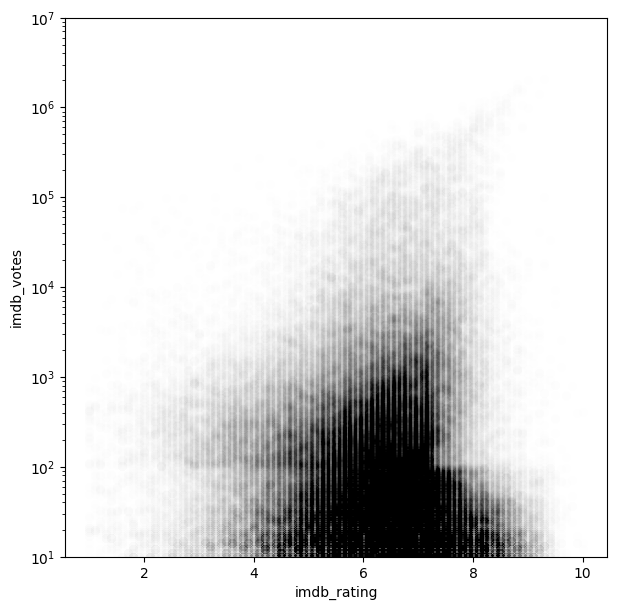

In [7]:
ax = movies_with_rating.plot.scatter(
    x="imdb_rating",
    y="imdb_votes",
    c="black",
    figsize=(7, 7),
    s=50,                # Velikost na "rozprostření"
    logy=True,
    alpha=0.002,         # > 99% průhlednost
    lw=0 ,               # bez okrajů
    ylim=(10, 1e7)
)

**Otázka (bez známé správné odpovědi):** Proč je nespojitost v hodnocení cca u sta hodnotících?

**Úkol:** zkus vytvořit graf zobrazující vztah mezi hodnocením filmu a počtem hlasů na Rotten Tomatoes (tabulka `rotten_tomatoes`).
- Velikost grafu nastav dle uvážení.
- Barva bodů oranžová, body nastav bez okraje.
- Průsvitnost bodů `0.5`.

Jak je možné tento graf interpretovat? Existuje vztah mezi hodnocením filmu (kolik % kritiků hodnotí film pozitivně) a počtem hlasů?

In [11]:
print(movies_with_rating)

           tconst                          title  \
0       tt0000009                     Miss Jerry   
1       tt0000147  The Corbett-Fitzsimmons Fight   
2       tt0000335          Soldiers of the Cross   
3       tt0000574    The Story of the Kelly Gang   
4       tt0000615             Robbery Under Arms   
...           ...                            ...   
232491  tt9910930                    Jeg ser deg   
232492  tt9911774      Padmavyuhathile Abhimanyu   
232493  tt9913056                   Swarm Season   
232494  tt9913084               Diabolik sono io   
232495  tt9914286              Sokagin Çocuklari   

                       original_title  is_adult    year  length  \
0                          Miss Jerry     False  1894.0    45.0   
1       The Corbett-Fitzsimmons Fight     False  1897.0    20.0   
2               Soldiers of the Cross     False  1900.0     NaN   
3         The Story of the Kelly Gang     False  1906.0    70.0   
4                  Robbery Under Arms   

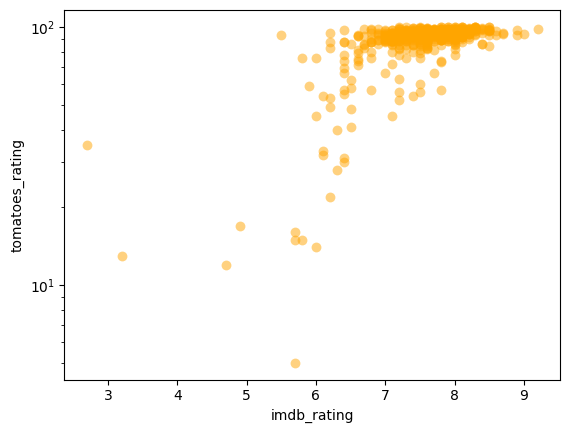

In [17]:
ax = movies_complete.plot.scatter(
    x= "imdb_rating",
    y= "tomatoes_rating",
    c="orange",
    #figsize=(5, 5),
    s=50,                # Velikost na "rozprostření"
    logy=True,
    alpha=0.5,         # > 99% průhlednost
    lw=0                # bez okrajů
    #ylim=(10, 1e7)
)

Jinou (a lepší) možností je "spočítat" dvourozměrný histogram, který místo binů "od-do" nabízí obdélníkové chlívečky ve dvou dimenzích. Poté ho lze vizualizovat pomocí *teplotní mapy* (heatmap) - každý obdélník se vybarví tím intenzivnější barvou, čím více hodnot do něj "spadlo". `pandas` ani `seaborn` tuto možnost jednoduše nenabízejí, ale `matplotlib` nabízí užitečnou funkci [`hist2d`](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.hist2d.html). Všimni si, že předáváme řady jako takové, nikoliv jejich názvy!

Při kreslení rovnou nastavíme dva klíčové argumenty:

- `range`: obsahuje dvojice mezí v jednotlivých dimenzích (nadbytek závorek je tuple tuplů).
- `cmap`: barevná paleta použitá pro vyjádření hodnot, seznam možností jde nalézt v [dokumentaci](https://matplotlib.org/examples/color/colormaps_reference.html).

**Poznámka:** Není úplně jednoduché pracovat s histogramy v logaritmické škále, a proto si vybereme jinou dvojici proměnných (hodnocení na IMDb a rotten tomatoes):

(array([[ 0.,  0.,  0.,  2.,  5.,  3.,  4.,  4.,  2.,  1.,  0.],
        [ 1.,  2.,  2.,  2.,  7.,  4.,  8.,  7.,  4.,  3.,  1.],
        [ 1.,  1.,  3.,  1.,  4.,  6., 10.,  8.,  9.,  3.,  1.],
        [ 1.,  3.,  3.,  6.,  5.,  4., 13., 15., 12.,  9.,  1.],
        [ 1.,  0.,  1.,  0.,  7.,  8.,  7., 10., 19.,  7.,  2.],
        [ 0.,  1.,  1.,  2.,  4.,  8., 12., 14., 16.,  8.,  4.],
        [ 0.,  0.,  0.,  1.,  0.,  7.,  2.,  7., 10.,  8.,  3.],
        [ 0.,  0.,  0.,  2.,  0.,  0.,  1.,  2.,  3., 11.,  4.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,  6.,  1.,  2.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.]]),
 array([6.85, 7.05, 7.25, 7.45, 7.65, 7.85, 8.05, 8.25, 8.45, 8.65, 8.85,
        9.05]),
 array([ 79.5,  81.5,  83.5,  85.5,  87.5,  89.5,  91.5,  93.5,  95.5,
         97.5,  99.5, 101.5]),
 <matplotlib.collections.QuadMesh at 0x210269d1550>)

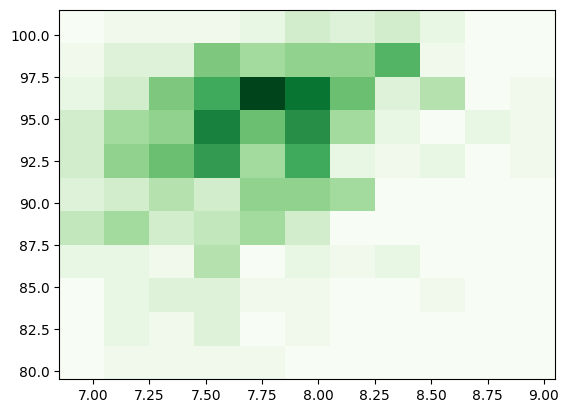

In [14]:
plt.hist2d(
    movies_complete["imdb_rating"],
    movies_complete["tomatoes_rating"],
    range=((6.85, 9.05), (79.5, 101.5)),
    bins=(11, 11),
    cmap="Greens"
)  # -> (data, hranice v první ose, hranice v druhé ose, objekt grafu)

Čím tmavší zelená, tím více filmů je v daném rozsahu.

Následující obrázek intuitivně vyjadřuje, jak body do chlívečků padají (vlevo trochu zamíchané body, vpravo spočítané obsahy chlívečků):

![Plnění 2D histogramu](static/plneni_2d_hist.png)

*Kód (velmi volitelný) k vytvoření obrázku je v bonusovém materiálu*

**Úkol**: Vytvoř graf z předcházejícího úkolu (vztah mezi hodnocením filmu a počtem hlasů na Rotten Tomatoes – tabulka `rotten_tomatoes`) ve formě dvourozměrného histogramu.
- Rozpětí hodnot pro hodnocení nastav od 70 do 100, rozpětí pro počet hlasů od 0 do 450.
- Vytvoř 6 binů pro hodnocení a 9 binů pro počet hlasů.
- Barvu grafu zvol oranžovou.

Biny nemusí být jenom pravoúhlé, ale pokud chceme poněkud méně diskriminovat různé směry, můžou se hodit biny šestiúhelníkové, které vykreslíš metodou [`.plot.hexbin`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hexbin.html):

<Axes: xlabel='imdb_rating', ylabel='tomatoes_rating'>

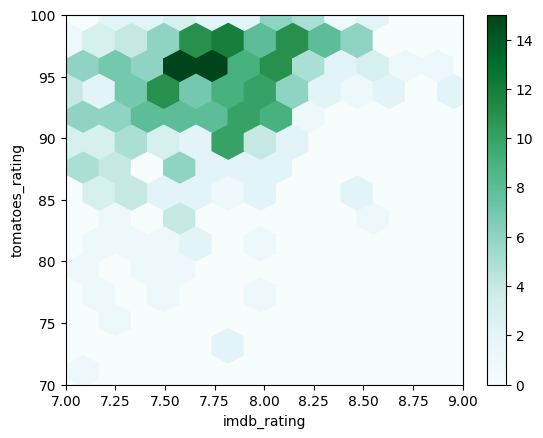

In [18]:
movies_complete.plot.hexbin(
    x="imdb_rating",
    y="tomatoes_rating",
    xlim=(7, 9),
    ylim=(70, 100),
    gridsize=40
)

**Úkol:** Také si zkus vytvořit graf pro hodnocení filmu a počet hlasů na Rotten Tomatoes se šestiúhelníkovými biny.
- Rozpětí hodnot na ose s hodnocením od 70 do 100.
- Počet šestiúhelníků `(25, 5)`, jestli je hodnocení na ose x, `(5, 25)` jestli je na ose y.
- Barva grafu oranžová.

Který tvar binů se ti líbí víc?

Jinou možností, výpočetně náročnější, je odhadnout hustotu pravděpodobnosti výskytu filmů s danými souřadnicemi obou hodnocení. K tomu slouží tzv. **jádrový odhad hustoty** (kernel density estimate). Je to vlastně trochu sofistikovanější podoba splývání bodů, které jsme předvedli výše - kolem každého bodu se uvažuje pravěpodobnostní jádro, neboli **kernel** (typicky gaussovský), a výsledná pravděpodobnost je rovná součtu kernelů v daném místě souřadnicové soustavy.

V `seaborn`u k tomu slouží funkce [`kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) - v jednorozměrném případě kreslí křivku, v dvourozměrném umí vykreslit buď "vrstevnice", nebo plochy různě intenzivní barvou podle spočítané hustoty pravděpodobnosti.

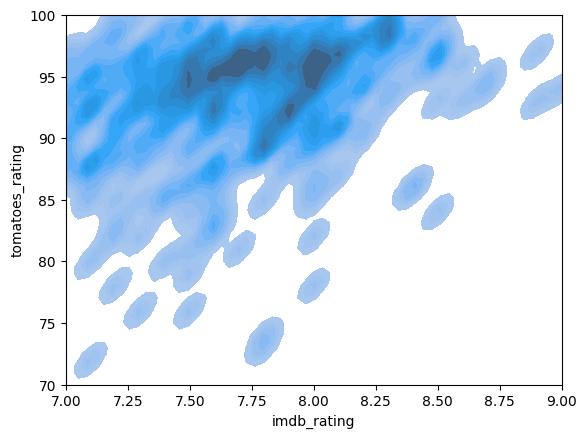

In [19]:
ax = sns.kdeplot(
    x=movies_complete["imdb_rating"],
    y=movies_complete["tomatoes_rating"],
    n_levels=15,                        # Počet úrovní intenzity
    fill=True,                          # Nechceme jen "vrstevnice", ale barevnou výplň
    bw_method=.06                       # Magický faktor pro míru "rozpití"
)

# Ještě si pomocí matplotlibu upravíme rozsahy os
ax.set_xlim(7, 9)
ax.set_ylim(70, 100);

**Úkol:** Na datech pro hodnocení filmu a počet hlasů na Rotten Tomatoes vytvořme také graf s jádrovým odhadem hustoty (`kde`).
- Rozpětí hodnot pro hodnocení filmu opět od 70 do 100.
- Počet úrovní intenzity 10.
- Graf bude mít barevnou výplň, ne jenom vrstevnice.
- Barva grafu oranžová.

Funkce seabornu zvaná [`jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) umí velice elegantně vytvořit kombinovaný graf obsahující:

* **sdružené rozdělení** v podobě čtvercového grafu některého z výše uvedených typů (jeho jméno přijde do argumentu `kind`) pro vztah obou proměnných.

* **marginální rozdělení** v obou proměnných nezávisle (malé histográmky nebo jádrové odhady hustoty po stranách)

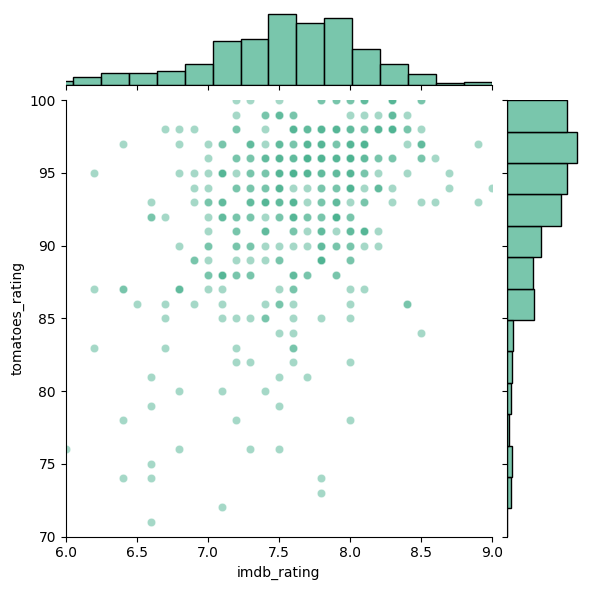

In [20]:
g = sns.jointplot(
    data = movies_complete,
    x = "imdb_rating",
    y = "tomatoes_rating",
    kind="scatter",
    color="#4CB391",
    xlim=(6, 9),
    ylim=(70, 100),
    alpha=.5
);


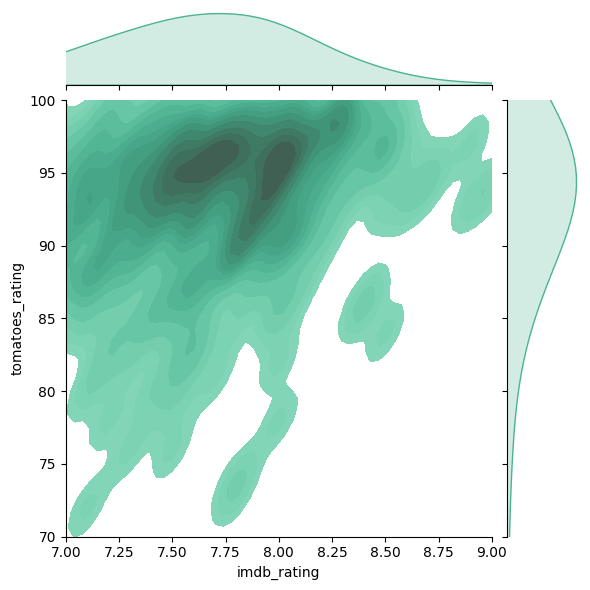

In [21]:
sns.jointplot(
    data = movies_complete,
    x = "imdb_rating",
    y = "tomatoes_rating",
    kind="kde",
    color="#4CB391",
    n_levels=15,
    fill=True,
    xlim=(7, 9),
    ylim=(70, 100),
    joint_kws = {"bw_method": .1}
);

**Úkol:** Na závěr ještě zkus vytvořit kombinovaný graf jointplot. Jako podkladová data opět využij hodnocení filmu a počet hlasů na Rotten Tomatoes.
- Druh grafu nastav `kde` nebo `scatter`.
- Barva grafu oranžová.
- Rozpětí hodnot pro hodnocení opět od 70 do 100.
- 10 úrovní intenzity pro `kde` nebo průsvitnost 0.5 pro `scatter`.

Který z prezentovaných grafů se ti líbí nejvíc? Proč?

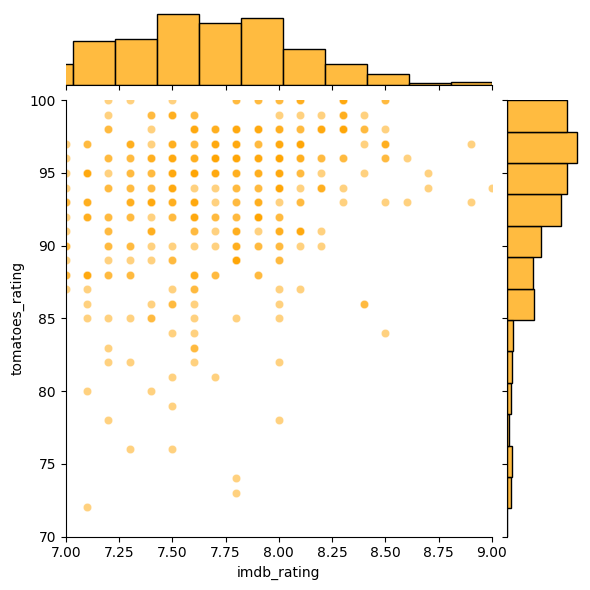

In [30]:
sns.jointplot(
    data=movies_complete,
    x = "imdb_rating",
    y = "tomatoes_rating",
    kind = "scatter",
    color = "orange",
    #fill=True,
    xlim=(7, 9),
    ylim=(70, 100), 
    alpha=0.5
);

### Korelace (a nikoliv kauzalita)

Máme-li dvě proměnné, obvykle nás zajímá, jak spolu souvisejí. Jestli ze změny jedné můžeme usuzovat na změnu druhé a naopak. V tomto smyslu rozlišuje dva základní úrovně vztahu:

[**Korelace**](https://cs.wikipedia.org/wiki/Korelace) mezi dvěma proměnnými znamená, že pokud se jedna z nich mění, mění se nějakým způsobem i druhá, a to v míře, kterou dokážeme alespoň částečně odhadnout. Není řečeno (obvykle to ani nejde), jestli jde o vztah příčinný (jedním, nebo druhým směrem), nebo jestli jsou třeba obě proměnné jen závislé na nějakém třetím faktoru.

[**Kauzalita**](https://cs.wikipedia.org/wiki/Kauzalita) naproti tomu znamená, že jedna proměnná je opravdu závislá na druhé, a tedy že cílenou změnou první můžeme přivodit změnu druhé. 

Statistickými metodami je velice snadné prokázat korelaci, naopak je velice obtížné až nemožné ze samotných čísel vykoukat kauzalitu - to většinou vyžaduje hlubší znalost kontextu a cílené experimentování, nikoliv jen pozorování.

My si můžeme říct, jak spolu souvisí (jaká je korelace mezi nimi) hodnocení na IMDb a Rotten Tomatoes, ale těžko z čísel vyčteme, jestli se navzájem ovlivňují (aniž bychom se ptali hlasujících, na základě čeho se rozhodovali). Nejspíš selským rozumem dojdeme k tomu, že z hlediska kauzality jsou obě hodnocení nezávislá a že za případnou korelaci může spíše třetí faktor, tj. "jak se film povedl".

#### Korelační koeficient

Ve světě statistiky míru korelace obvykle vyjadřujeme pomocí **korelačního koeficientu**. To je bezrozměrné číslo od -1 do 1, přičemž 0 znamená naprostou nezávislost, 1 značí, že jakákoliv změna v jedné veličině je provázena stejně významnou změnou ve veličině druhé, -1 pak značí změnu stejně významnou, ale v opačném směru.

Existuje několik metod výpočtu korelačního koeficientu. Pandas umí v základu tři, z nich si ukážeme jen ten výchozí, Pearsonův, který je ideální pro odhalení lineárních vztahů.

Následující obrázek ukazuje typické hodnoty korelačního koeficientu pro různá rozdělení dvou proměnných:

![Ukázky korelačních koeficientů](static/korelace.png)

*Obrázek převzat z [wikipedie](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg).*

Výpočet korelačního koeficientu mezi dvěma `Series` se v pandas provede zavoláním metody [`.corr`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html):

In [31]:
movies_complete["imdb_rating"].corr(movies_complete["tomatoes_rating"])

np.float64(0.6673272196886042)

Číslo 0,667 ukazuje na poměrně silný vztah - čím lepší hodnocení na jednom serveru, tím lepší hodnocení na serveru druhém.

Kompletní tabulku korelačních koeficientů mezi všemi sloupci v tabulce získáš metodou [`.corr`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) na tabulce samotné:

In [32]:
movies_complete.corr(method="pearson", numeric_only=True)  # Jsme explicitní ohledně typu koeficientu

,Unnamed: 0,is_adult,year,length,imdb_rating,imdb_votes,boxoffice_rank,lifetime_gross,tomatoes_rating,tomatoes_votes
Unnamed: 0,1.000000,NaN,0.111334,-0.271571,-0.411800,-0.818634,0.733054,-0.626876,-0.182300,-0.528328
is_adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,0.111334,NaN,1.000000,-0.164026,-0.258788,-0.020599,0.024687,0.105194,-0.143181,0.583895
length,-0.271571,NaN,-0.164026,1.000000,0.264138,0.325280,-0.227022,0.211506,0.001890,0.141379
imdb_rating,-0.411800,NaN,-0.258788,0.264138,1.000000,0.465902,-0.107621,0.202497,0.667327,0.075651
imdb_votes,-0.818634,NaN,-0.020599,0.325280,0.465902,1.000000,-0.529907,0.649080,0.167706,0.434226
boxoffice_rank,0.733054,NaN,0.024687,-0.227022,-0.107621,-0.529907,1.000000,-0.612221,0.028940,-0.432609
lifetime_gross,-0.626876,NaN,0.105194,0.211506,0.202497,0.649080,-0.612221,1.000000,0.077516,0.499844
tomatoes_rating,-0.182300,NaN,-0.143181,0.001890,0.667327,0.167706,0.028940,0.077516,1.000000,0.059786
tomatoes_votes,-0.528328,NaN,0.583895,0.141379,0.075651,0.434226,-0.432609,0.499844,0.059786,1.000000


Co je z tabulky vidět?

- každá proměnná plně koreluje sama se sebou (1,0)
- nelze spočítat korelační koeficient `is_adult`, protože tento sloupec obsahuje jen jednu hodnotu 
- jak jsme již zmiňovali, hodně korelují hodnocení na IMDb a na Rotten Tomatoes
- čím více hlasů na IMDb, tím obvykle lepší hodnocení (kdo by se díval na špatné filmy?), vyšší celkový zisk v kinech (kdo by hodnotil, kdyby film nikdo neviděl?)
- možná překvapí silná korelace počtu hodnocení na Rotten Tomatoes a roku premiéry (je to tím, že se filmově-kritické weby množí jako houby po dešti?)

A mnoho dalšího...

**Varování:** Velký (kladný nebo záporný) korelační koeficient téměř vždy značí nějaký (zejména lineární či aspoň monotónní) vztah mezi proměnnými. Opačně to ovšem neplatí - korelační koeficient blízký nule může zahrnovat jak případy naprosté nezávislosti, tak situace, kdy vztah mezi proměnnými je komplexnějšího charakteru, jak je vidět v dolním řádku obrázku výše.

Dovedeno do extrému, není vůbec problém nakreslit téměř libovolně vypadající obrázek alias bodový graf, který bude mít dané souhrnné statistiky (tedy naivně pohlíženo "bude stejný"). V pěkném interaktivním článku [Same Stats, Different Graphs...](https://www.autodeskresearch.com/publications/samestats) autoři ukazují pěkné animace plynulých přechodů mezi naprosto odlišně vyhlížejícími sadami, aniž by se změnila kterákoliv ze základních statistik včetně korelací.

Pokud chceš najednou zobrazit vztahy všech dvojic různých numerických proměnných, může se hodit funkce [`pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html), která vykresli čtvercovou mřížku s histogramy na diagonále a dvourozměrnými grafy (ve výchozím nastavení bodovými) mimo diagonálu:

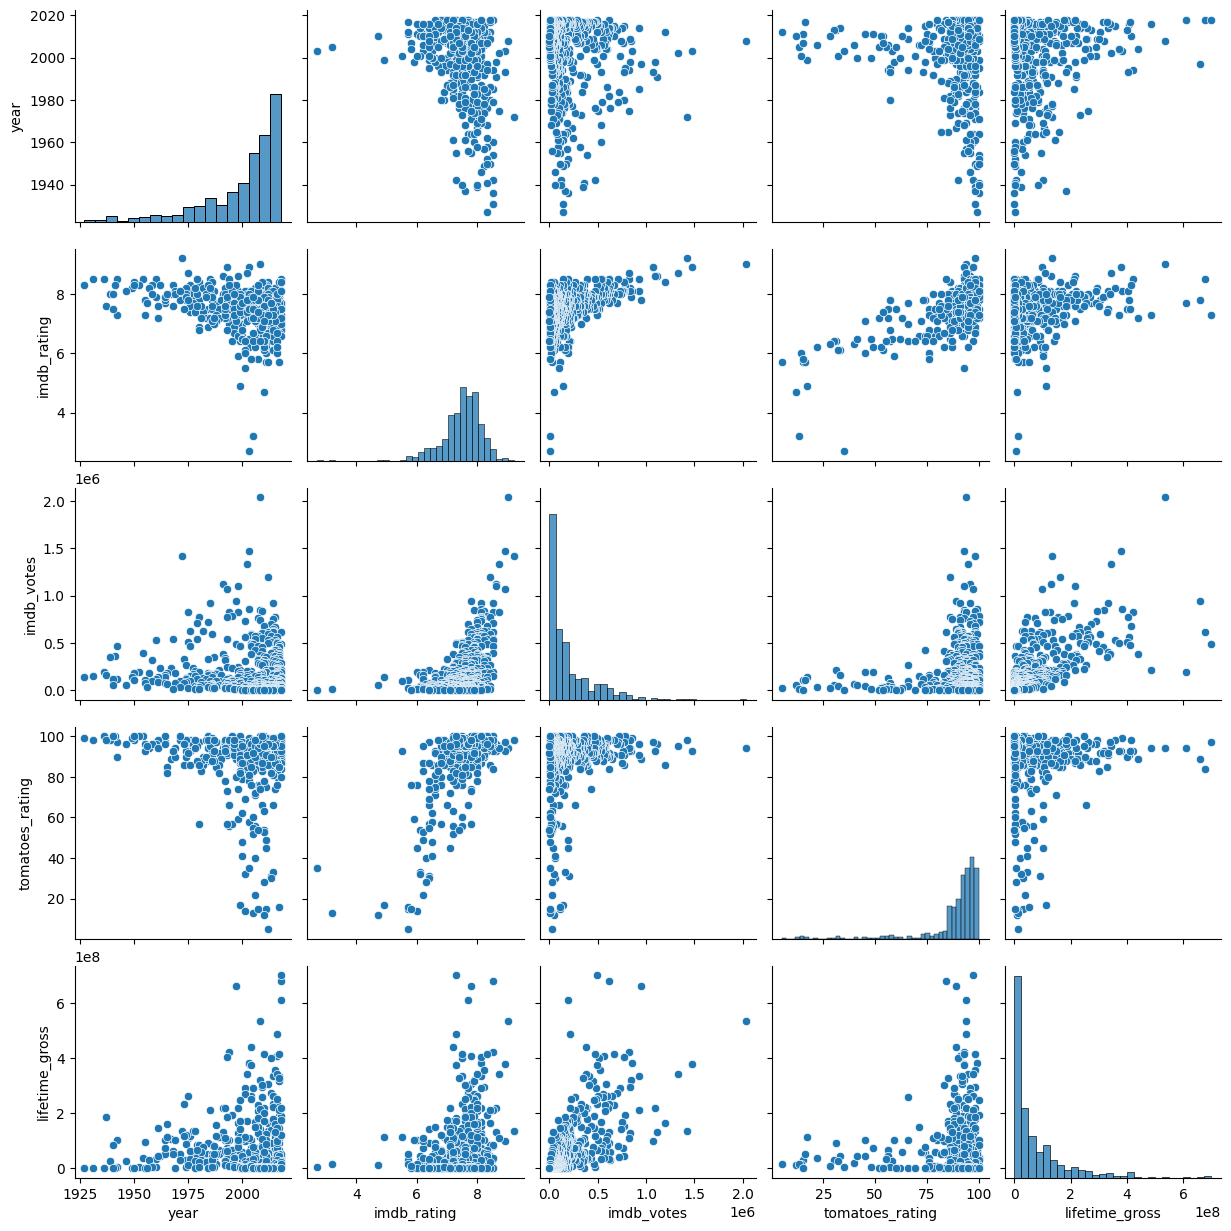

In [33]:

sns.pairplot(movies_complete, vars = ["year", "imdb_rating", "imdb_votes", "tomatoes_rating", "lifetime_gross"])

### Dvě kategorické proměnné


Protože máme kategorických proměnných v tabulkách o filmech málo, musíme si je vyrobit. A přitom se naučíme další dva triky.

**První trik:** Kategorická proměnná z číselné

Vezmeme rok premiéry filmu a přiřadíme mu dekádu pomocí funkce [`cut`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html). Tato funkce vezme nějakou číselnou `Series` a hranice binů ("chlívečků", stejně jako u histogramu) a každou hodnotu označí příslušným intervalem (jeho dolní a horní hranicí):

In [34]:
pd.cut(
    movies_with_rating["year"],
    bins=range(1890, 2021, 10)     # 1890, 1900, 1910, ..., 2020
)

0         (1890, 1900]
1         (1890, 1900]
2         (1890, 1900]
3         (1900, 1910]
4         (1900, 1910]
              ...     
232491    (2010, 2020]
232492    (2010, 2020]
232493    (2010, 2020]
232494    (2010, 2020]
232495    (2010, 2020]
Name: year, Length: 232496, dtype: category
Categories (13, interval[int64, right]): [(1890, 1900] < (1900, 1910] < (1910, 1920] < (1920, 1930] ... (1980, 1990] < (1990, 2000] < (2000, 2010] < (2010, 2020]]

To je přesné, ale nepříliš estetické. Takže provedeme ještě jednu úpravu - z intervalu pomocí metody `apply` a námi definové funkce uděláme hezké označení dekády (`(1980, 1990]` nahradíme řetězcem `"1980s"`).

In [35]:
def interval_to_decade_name(interval):
    """Převede (1980, 1990] na 1980s apod."""
    return str(interval.left)+"s"

pd.cut(
    movies_with_rating["year"],
    bins=range(1890, 2021, 10)
).apply(interval_to_decade_name)

0         1890s
1         1890s
2         1890s
3         1900s
4         1900s
          ...  
232491    2010s
232492    2010s
232493    2010s
232494    2010s
232495    2010s
Name: year, Length: 232496, dtype: category
Categories (13, object): ['1890s' < '1900s' < '1910s' < '1920s' ... '1980s' < '1990s' < '2000s' < '2010s']

💡 V pravém smyslu dekáda není kategorickou, ale **ordinální** proměnnou, protože má přirozené řazení, ale nic nám nebrání s ní jako s kategorickou zacházet.

**Druhý trik:** Kategorická proměnná ze seznamu hodnot
    
Sloupec `genres` je velice užitečný, ale protože obsahuje různé kombinace hodnot, navíc oddělených čárkou v řetězci, s ním samotným toho moc nepořídíme. Potřebujeme proto skupiny žánrů rozhodit do nezávislých řádků (každý film se nám pak v tabulce opakovat tolikrát, do kolika různých žánrů patří). K tomu použijeme metody [`str.split`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html) (rozděluje řetězec na seznam podle nějakého oddělovače) a [`explode`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html) (zkopíruje řádek pro každou jednotlivou položku seznamu v nějakém sloupci):

In [36]:
(movies_with_rating["genres"]
    .str.split(",")    # řetězec -> seznam
    .explode()         # zkopíruje řádky => pro každý žánr jednu kopii
)

0             Romance
1         Documentary
1                News
1               Sport
2           Biography
             ...     
232492          Drama
232493    Documentary
232494    Documentary
232495          Drama
232495         Family
Name: genres, Length: 397539, dtype: object

Toto je pravověrná kategorická proměnná. Pojďme si tedy sestavit tabulku, která obsahuje obě:

In [37]:
decades_and_genres = (
    movies_with_rating.assign(
        decade = pd.cut(
            movies_with_rating["year"],
            bins=range(1890, 2021, 10)
        ).apply(interval_to_decade_name),
        genres = movies_with_rating["genres"].str.split(",")
    )
    .rename({"genres": "genre"}, axis="columns")
    .explode("genre")
)[["title", "genre", "decade", "imdb_rating", "imdb_votes"]]

decades_and_genres

,title,genre,decade,imdb_rating,imdb_votes
0,Miss Jerry,Romance,1890s,5.5,77
1,The Corbett-Fitzsimmons Fight,Documentary,1890s,5.2,289
1,The Corbett-Fitzsimmons Fight,News,1890s,5.2,289
1,The Corbett-Fitzsimmons Fight,Sport,1890s,5.2,289
2,Soldiers of the Cross,Biography,1890s,6.3,39
...,...,...,...,...,...
232492,Padmavyuhathile Abhimanyu,Drama,2010s,8.5,363
232493,Swarm Season,Documentary,2010s,6.2,5
232494,Diabolik sono io,Documentary,2010s,6.2,6
232495,Sokagin Çocuklari,Drama,2010s,9.8,72


U dvou kategorických proměnných nás obvykle zajímá, jak často se vyskytuje jejich kombinace - v našem případě tedy kolik filmů daného žánru bylo natočeno v které dekádě. Toto přesně dělá funkce [`crosstab`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html):

In [38]:
decades_vs_genres = pd.crosstab(
    decades_and_genres["decade"],   # Co se použije jako řádky
    decades_and_genres["genre"],    # Co se použije jako sloupce
)
decades_vs_genres

genre,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
decade,,,,,,,,,,,,,,,,,,,,,
1890s,0,0,0,0,1,3,0,5,1,0,...,5,0,2,1,0,5,0,0,0,0
1900s,0,0,4,0,3,6,2,7,31,2,...,1,0,3,0,0,6,0,0,3,0
1910s,117,2,419,5,25,229,99,38,849,13,...,0,0,170,20,1,6,0,25,62,106
1920s,452,0,768,9,33,790,241,73,1777,27,...,0,0,818,21,0,37,0,55,81,227
1930s,942,0,1031,19,118,2863,1141,118,3967,129,...,3,0,1855,74,0,103,0,153,240,688
1940s,857,0,984,41,162,2555,1087,153,3929,196,...,0,0,1254,45,0,64,0,257,609,765
1950s,738,0,1148,41,261,3318,1420,224,6036,468,...,1,1,1762,261,0,84,1,427,576,674
1960s,1376,63,1673,102,193,4322,1628,577,7492,651,...,0,0,1931,344,0,91,0,752,741,677
1970s,2658,1553,1493,194,319,5061,2113,959,8974,843,...,1,2,1725,420,2,153,1,1254,495,439


Případně nemusíme zkoumat jenom počet, může nás zajímat i jiná agregace - v tom případě musíme uvést argumenty `values` (na čem se agregace bude provádět) a `aggfunc` (jaká agregační funkce se použije). 

Zkusme tedy např. průměrné hodnocení jednotlivých žánrů v dané dekádě (že by se dokumentání filmy lepšily a horory horšily?):

In [39]:
decades_vs_genres_rating = pd.crosstab(
    index=decades_and_genres["decade"],
    columns=decades_and_genres["genre"],
    values=decades_and_genres["imdb_rating"],
    aggfunc="mean"
)

decades_vs_genres_rating[["Documentary", "Horror"]]  # Vybereme dva zajímavé sloupce

genre,Documentary,Horror
decade,,
1890s,4.480000,NaN
1900s,5.228571,NaN
1910s,6.631579,6.085455
1920s,6.815068,6.629630
1930s,6.651695,6.145238
1940s,6.656863,6.009353
1950s,6.698214,5.617152
1960s,6.844887,5.419376
1970s,6.980501,5.309965


Pokud si chceme hodnoty z `.crosstab`, můžeme si nakreslit teplotní mapu (podobně jako dříve u dvourozměrných histogramů) pomocí funkce [`heatmap`](https://seaborn.pydata.org/generated/seaborn.heatmap.html):

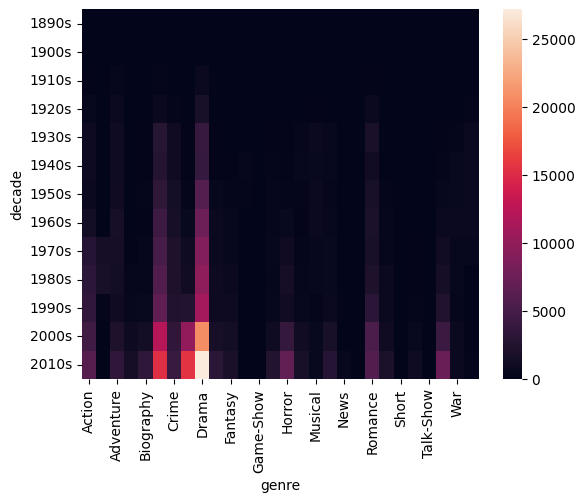

In [40]:
sns.heatmap(decades_vs_genres);

Toto jednoduché zobrazení asi není příliš přehledné, proto zkusíme přidat trochu estetiky. Většinu popsaných argumentů najdeš v dokumentaci a okomentovanou přímo v kódu, širší komentář (zejména k barevné paletě) pro "jednoduchost" vynecháme:

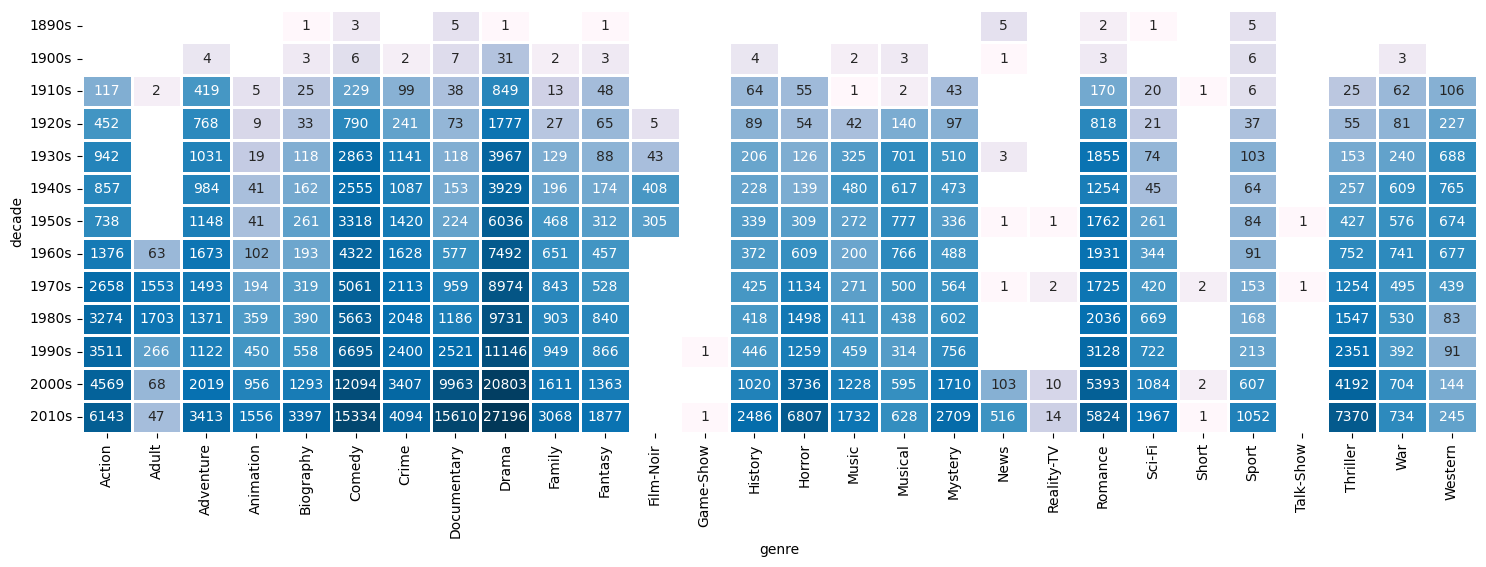

In [41]:
from matplotlib.colors import LogNorm

# Vytvoříme si škálu hodnot rovnoměrnou v logaritmickém měřítku
# Tato škála se pakkterá bude mapovat 
log_norm = LogNorm(
    vmin=1,                                # Kde škála začíná
    vmax=decades_vs_genres.max().max(),    # Kde škála končí
)

_, ax = plt.subplots(figsize=(18,5.5))   # Vytvoříme dostatečně veliký graf
sns.heatmap(
    decades_vs_genres,
    ax=ax,                  # Kreslíme do připraveného objektu `Axes`
    vmin=1,                 # Ignorujeme nulové hodnoty (nejdou logaritmovat!)
    linewidths=1,           # Oddělíme jednotlivá okénka
    annot=True,             # Chceme zobrazit hodnoty
    fmt="d",                # Zobrazíme hodnoty jako celá čísla
    norm=log_norm,          # Použijeme škálování
    cmap="PuBu",            # Vybereme si barevnou paletu
    cbar=False,             # Schováme barevný proužek vpravo, nepotřebujeme ho
);
ax.set_ylim(13, 0);         # Obcházíme oříznutí, které je asi bug seabornu

Prakticky vzato se pak tato vizualizace nachází někde na pomezí tabulky a grafu.

### Kategorická a číselná proměnná

Když se zkoumají vztahy kategorických a numerických proměnných, koukáme se vlastně na sadu numerických proměnných, vyhodnocovaných pro každou hodnotu kategorické proměnné zvlášť. V našem případě tedy pro horory zvlášť, pro dokumenty zvlášť apod. Z výpočetního hlediska je toto téma pro shlukování a operaci `groupby`, kterým se detailně věnuje příští hodina. Nyní si jen ukážeme některé pěkné vizualizace.

Předtím, než začneme s použitím knihovny seaborn, musíme upravit dulicitu indexů, která nám zatím vznikla. Druhá možnost by byla vybrat subset filmů, například dokumentů. 


In [42]:
decades_and_genres = decades_and_genres.reset_index() # seabornu vadí duplicitní index

Krabicový graf si jistě pamatuješ z minula, pomocí seabornu ho vytvoříš zavoláním funkce [`boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) - jen se nekreslí krabičky pro různé proměnné, ale pro tutéž číselnou proměnnou, jen v závislosti na hodnotě proměnné kategorické:

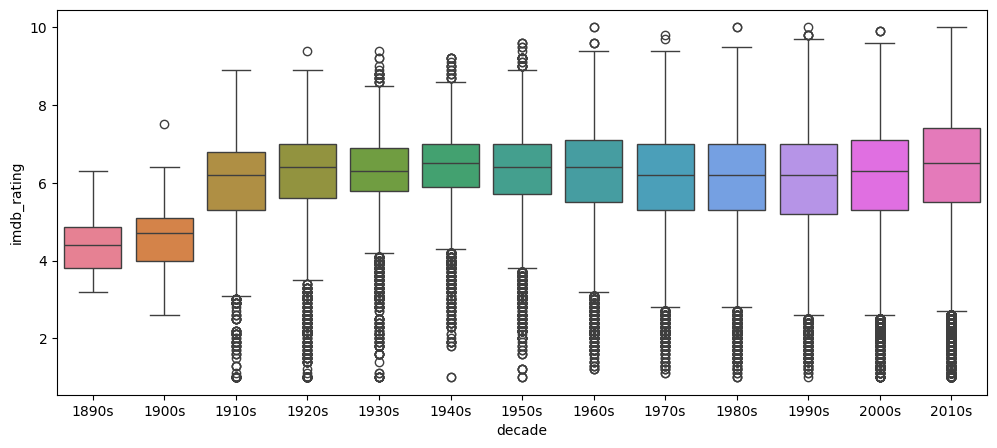

In [43]:


_, ax = plt.subplots(figsize=(12, 5))     # boxplot neumí specifikovat velikost grafu
sns.boxplot(data=decades_and_genres, 
    x="decade",
    y="imdb_rating",
    hue= "decade", # obarvení grafu, aby jednotlivé dekády neměly stejnou barvu
    ax=ax
    )       # kam se bude kreslit
ax.get_legend().set_visible(False) # smazání legendy

Vedle toho "strip plot" (funkce [`stripplot`](https://seaborn.pydata.org/generated/seaborn.stripplot.html)) znázorňuje každou hodnotu tečkou, vysázenou ve sloupci nad příslušnou kategorií (ve správné výšce, nicméně přesné horizontální umístění nenese žádnou informaci):

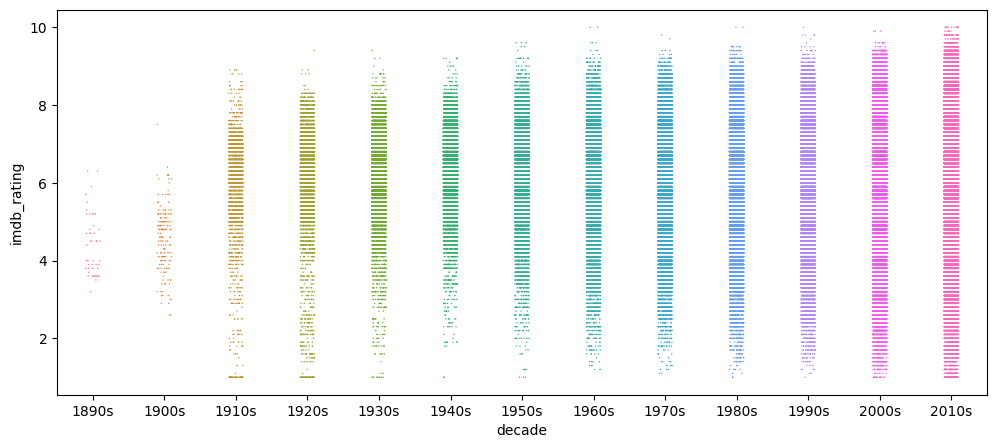

In [44]:
_, ax = plt.subplots(figsize=(12, 5)) # stripplot neumí specifikovat velikost grafu
sns.stripplot(
    data=decades_and_genres,   # seabornu vadí duplicitní index
    x="decade",
    y="imdb_rating",
    s=1,
    ax=ax, 
    hue= "decade"
    )       # kam se bude kreslit
ax.get_legend().set_visible(False)

Velice podobnou roli jako krabicový graf hraje houslový ~plot~ graf, který místo čtverců nabízí miniaturní křivku hustoty pravděpodobnosti (resp. jádrový odhad). Vykreslíš ho funkcí [`violinplot`](https://seaborn.pydata.org/generated/seaborn.violinplot.html?):

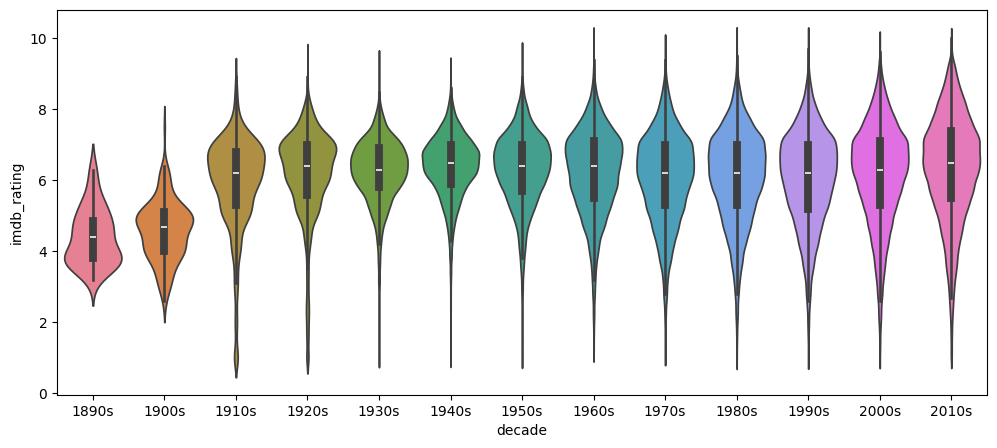

In [45]:
_, ax = plt.subplots(figsize=(12, 5))  # violinplot neumí specifikovat velikost grafu
sns.violinplot(
    data=decades_and_genres,
    x="decade",
    y="imdb_rating",
    ax=ax,
    hue= "decade"
    )       # kam se bude kreslit
ax.get_legend().set_visible(False)

## Vztahy mezi více proměnnými

Pokud si tyto materiály nečteš na holografickém displeji, jsi při zobrazování dat omezen/a na dva rozměry. Můžeš si prohlížet dvourozměrné tabulky, kreslit dvourozměrné grafy. Interaktivní knihovny pro vizualizaci dat ti pomocí posuvníků umožní prohlížet si různé jednorozměrné nebo dvourozměrné řezy vícerozměrných vztahů.

Matplotlib i plotly umějí vykreslovat 3D grafy, tak se tím můžeš inspirovat, ale není to moc praktické.

💡 V jistém smyslu jsme si už předminule ukázali, jak třetí a čtvrtý rozměr do dvourozměrného grafu přeci jen propašovat - pomocí barvy a velikosti symbolu. Ne vždy je to snadné a přehledné, ale v některých situacích je to dobrá volba.

### 3D grafy (nepovinné až zbytečné)

Pokud chceš v matplotlibu kreslit trojrozměrné grafy, musíš si síť souřadnic vytvořit specifickým způsobem.

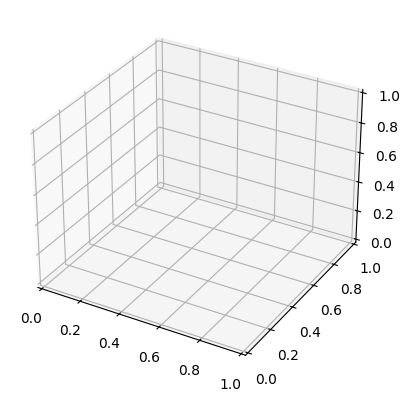

In [46]:
from mpl_toolkits.mplot3d import Axes3D     # Import, bez kterého nebude následující fungovat

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 

Potom už se zbylá volání budou chovat podobně jako ve dvou rozměrech:

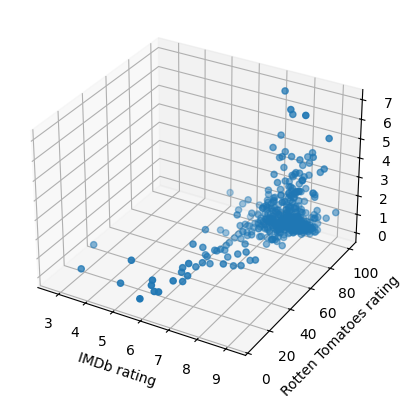

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    movies_complete["imdb_rating"],
    movies_complete["tomatoes_rating"],
    movies_complete["lifetime_gross"])
ax.set_xlabel("IMDb rating")
ax.set_ylabel("Rotten Tomatoes rating")
ax.set_zlabel("Gross (total)");

Graf je to poněkud statický a třetí rozměr nám uniká (a ani 3D brýle nepomohou). 

Pokud kreslíš grafy mimo jupyter notebook a máš například nainstalovaný framework Qt, můžeš si grafy z matplotlibu
prohlížet i interaktivně, což v tomto případě je velice užitečné.

Naproti tomu uvnitř notebooku v notebooku je výrazně efektivnější použít `plotly` (resp. `plotly.express`):

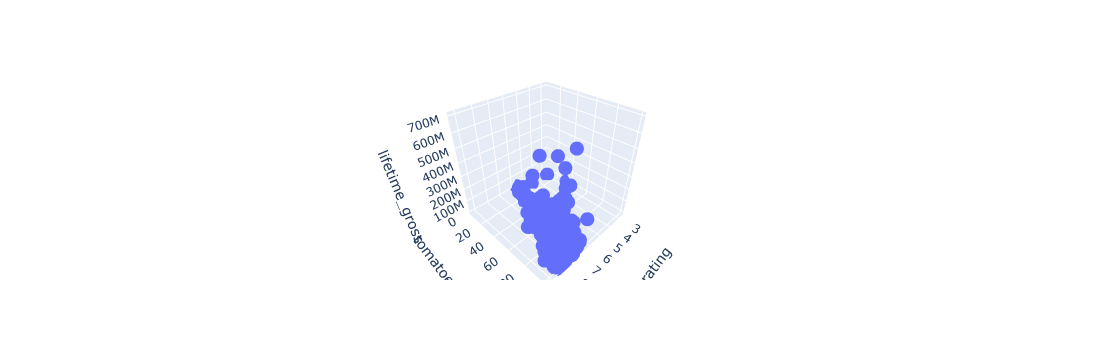

In [48]:
# Toto nemusí fungovat všem, můj prohlížeč si stěžuje na chybějící WebGL
import plotly.express as px
fig = px.scatter_3d(movies_complete, x="imdb_rating", y="tomatoes_rating", z="lifetime_gross", hover_name="title")
fig.show()

## Bonusový materiál

Obrázek ilustrující plnění 2D histogramu:

In [52]:
pip install physt

Note: you may need to restart the kernel to use updated packages.


C:\Users\Acer\Desktop\PyLadies\Pyladies_Data\.venv\Scripts\python.exe: No module named pip


In [50]:
import numpy as np
import physt

np.random.seed(42)

limits=[(6.85, 9.05), (79.5, 101.5)]
bins=[11, 11]

# Ve phystu vytvoříme objekt 2D histogramu
h2 = physt.h2(
    movies_complete["imdb_rating"],
    movies_complete["tomatoes_rating"],
    bins=bins,
    range=limits,
)

# Chceme ne jeden, ale dva grafy vedle sebe!!!
fig, ax = plt.subplots(1, 2, figsize=(10,4))

##### levý graf

# Vykreslíme si histogram, ale schováme ho
h2.plot(
    cmap="Greens",            # Paleta, kterou použijeme v pravém grafu
    cmap_min=0,
    cmap_max=1e9,             # Zajistíme si, že všechy biny budou mít první barvu palety
    show_zero=False,          # Nenakreslí se nám prázdné biny
    ax=ax[0],                 # Nakreslíme do levého podgrafu
    show_colorbar=False,      # Nepotřebujeme legendu k paletě
    zorder=-1,                # Schováme za následující scatterplot
    #alpha=0,
)

# Scatterplot překreslený přes "histogram" s body mírně rozházenými, aby se daly spočítat
ax[0].scatter(
    movies_complete["imdb_rating"] + np.random.uniform(-.03, .03, len(movies_complete["imdb_rating"])),
    movies_complete["tomatoes_rating"]+ np.random.uniform(-.3, .3, len(movies_complete["imdb_rating"])),
    s=4,
    color="black",
    alpha=0.4,
)
ax[0].set_xticks([7.0, 7.5, 8.0, 8.5, 9.0])

##### Pravý graf ukazuje, kolik bodů spadlo do kterého obdélníku

# Tady už použijeme vykreslování histogramů

h2.plot(
    show_values=True,         # Chceme v binech zobrazit čísla
    cmap="Greens", 
    show_zero=False,
    ax=ax[1],                 # Kreslíme do pravéoho podgrafu
    show_colorbar=True        # Chceme ukázat legendu k paletě
)

# Uložíme obrázek s dostatečným rozlišením

fig.savefig("static/plneni_2d_hist.png", dpi=75)

ModuleNotFoundError: No module named 'physt'